In [48]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [49]:
data = pd.read_csv('corona_tested_006.csv')
data.head()

C:\Users\Rubina\AppData\Local\Temp\ipykernel_23316\2792723377.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [50]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  278848
No of col =  11


In [51]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [52]:
# data = data.drop(['Age_60_above','Sex'], axis = 1)

In [53]:
data = data.dropna()


In [54]:
data.shape

(278848, 11)

In [55]:
data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool').astype('int')
data['Fever'] = data['Fever'].astype('bool').astype('int')
data['Sore_throat'] = data['Sore_throat'].astype('bool').astype('int')
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype('bool').astype('int')
data['Headache'] = data['Headache'].astype('bool').astype('int')
# data['Age_60_above'] = data['Age_60_above'].astype('bool')
# data['Sex'] = data['Sex'].astype('bool')
# data['Known_contact'] = data['Known_contact'].astype('bool')

In [56]:
# data.describe()
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,1,1,1,1,negative,None,None,Abroad
1,2,11-03-2020,1,1,1,1,1,positive,None,None,Abroad
2,3,11-03-2020,1,1,1,1,1,positive,None,None,Abroad
3,4,11-03-2020,1,1,1,1,1,negative,None,None,Abroad
4,5,11-03-2020,1,1,1,1,1,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,positive,None,male,Other
278844,278845,30-04-2020,0,0,0,0,0,negative,None,female,Other
278845,278846,30-04-2020,0,0,0,0,0,negative,None,male,Other
278846,278847,30-04-2020,0,0,0,0,0,negative,None,male,Other


In [57]:
print(len(data[data['Corona'] == 'other']))
print(len(data[data['Corona'] == 'negative']))
print(len(data[data['Corona'] == 'positive']))

3892
260227
14729


In [58]:
data = data[data['Corona'] != 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,1,1,1,1,negative,None,None,Abroad
1,2,11-03-2020,1,1,1,1,1,positive,None,None,Abroad
2,3,11-03-2020,1,1,1,1,1,positive,None,None,Abroad
3,4,11-03-2020,1,1,1,1,1,negative,None,None,Abroad
4,5,11-03-2020,1,1,1,1,1,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,positive,None,male,Other
278844,278845,30-04-2020,0,0,0,0,0,negative,None,female,Other
278845,278846,30-04-2020,0,0,0,0,0,negative,None,male,Other
278846,278847,30-04-2020,0,0,0,0,0,negative,None,male,Other


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               274956 non-null  int64 
 1   Test_date            274956 non-null  object
 2   Cough_symptoms       274956 non-null  int32 
 3   Fever                274956 non-null  int32 
 4   Sore_throat          274956 non-null  int32 
 5   Shortness_of_breath  274956 non-null  int32 
 6   Headache             274956 non-null  int32 
 7   Corona               274956 non-null  object
 8   Age_60_above         274956 non-null  object
 9   Sex                  274956 non-null  object
 10  Known_contact        274956 non-null  object
dtypes: int32(5), int64(1), object(5)
memory usage: 19.9+ MB


In [60]:
data = data.iloc[:,2:]

In [61]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,1,1,1,1,negative,None,None,Abroad
1,1,1,1,1,1,positive,None,None,Abroad
2,1,1,1,1,1,positive,None,None,Abroad
3,1,1,1,1,1,negative,None,None,Abroad
4,1,1,1,1,1,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,positive,None,male,Other
278844,0,0,0,0,0,negative,None,female,Other
278845,0,0,0,0,0,negative,None,male,Other
278846,0,0,0,0,0,negative,None,male,Other


In [62]:
data = data.dropna()
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,1,1,1,1,negative,None,None,Abroad
1,1,1,1,1,1,positive,None,None,Abroad
2,1,1,1,1,1,positive,None,None,Abroad
3,1,1,1,1,1,negative,None,None,Abroad
4,1,1,1,1,1,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,positive,None,male,Other
278844,0,0,0,0,0,negative,None,female,Other
278845,0,0,0,0,0,negative,None,male,Other
278846,0,0,0,0,0,negative,None,male,Other


In [63]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
# data["Age_60_above"] = ord_enc.fit_transform(data[["Age_60_above"]]).astype('int')
# data["Sex"] = ord_enc.fit_transform(data[["Sex"]]).astype('int')
data["Known_contact"] = ord_enc.fit_transform(data[["Known_contact"]]).astype('int')
data["Corona"] = ord_enc.fit_transform(data[["Corona"]]).astype('int')

In [64]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,1,1,1,1,0,None,None,0
1,1,1,1,1,1,1,None,None,0
2,1,1,1,1,1,1,None,None,0
3,1,1,1,1,1,0,None,None,0
4,1,1,1,1,1,0,None,None,1
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,None,male,2
278844,0,0,0,0,0,0,None,female,2
278845,0,0,0,0,0,0,None,male,2
278846,0,0,0,0,0,0,None,male,2


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       274956 non-null  int32 
 1   Fever                274956 non-null  int32 
 2   Sore_throat          274956 non-null  int32 
 3   Shortness_of_breath  274956 non-null  int32 
 4   Headache             274956 non-null  int32 
 5   Corona               274956 non-null  int32 
 6   Age_60_above         274956 non-null  object
 7   Sex                  274956 non-null  object
 8   Known_contact        274956 non-null  int32 
dtypes: int32(7), object(2)
memory usage: 13.6+ MB


In [66]:
data.shape

(274956, 9)

In [67]:
df1 = data[data['Corona'] == 1]
df2 = data[data['Corona'] == 0].iloc[0:14694]
print(len(df1))
data = pd.concat([df1,df2])
print(len(df2))

14729
14694


In [68]:
# data.shape

In [69]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
1,1,1,1,1,1,1,None,None,0
2,1,1,1,1,1,1,None,None,0
43,1,1,1,1,1,1,None,None,0
45,1,1,1,1,1,1,None,None,0
47,1,1,1,1,1,1,None,None,0
...,...,...,...,...,...,...,...,...,...
16233,1,1,1,1,1,0,No,female,2
16234,1,1,1,1,1,0,No,male,2
16235,1,1,1,1,1,0,No,female,0
16237,1,1,1,1,1,0,No,female,2


In [70]:
data = data.sample(frac = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
35751,1,1,1,1,1,1,No,male,1
74771,1,1,1,1,1,1,No,male,2
271844,1,0,0,0,0,1,None,female,0
112661,1,1,0,0,0,1,No,female,1
10074,1,1,1,1,1,0,No,None,2
...,...,...,...,...,...,...,...,...,...
10965,1,1,1,1,1,0,No,None,2
132617,0,0,0,0,0,1,No,male,1
183276,0,0,0,0,0,1,None,male,1
12491,1,1,1,1,1,0,No,None,2


In [71]:
# data.describe()

In [72]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
Cough_symptoms,1.000000,0.792712,0.501256,0.494681,0.510340,-0.320003,0.042136
Fever,0.792712,1.000000,0.558231,0.551288,0.571081,-0.356815,0.081923
Sore_throat,0.501256,0.558231,1.000000,0.929013,0.914775,-0.632200,0.160307
Shortness_of_breath,0.494681,0.551288,0.929013,1.000000,0.912731,-0.644211,0.167483
Headache,0.510340,0.571081,0.914775,0.912731,1.000000,-0.617545,0.156940
Corona,-0.320003,-0.356815,-0.632200,-0.644211,-0.617545,1.000000,-0.425866
Known_contact,0.042136,0.081923,0.160307,0.167483,0.156940,-0.425866,1.000000


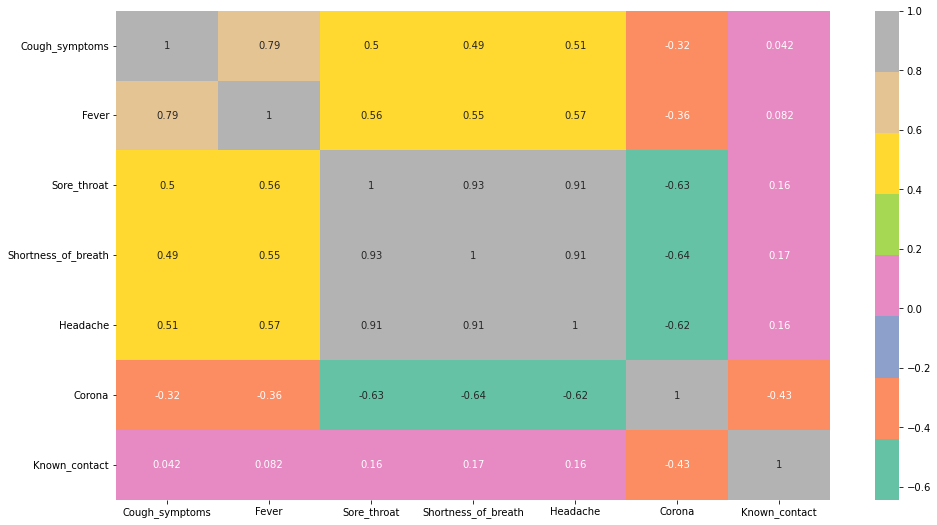

In [73]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [74]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [75]:
# training and normalization of data
X = data[['Cough_symptoms', 'Fever','Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']]
Y = data['Corona']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [77]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)



SVC()

In [78]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
10287,1,1,1,1,1,2
158411,0,0,0,0,0,1
151385,1,1,0,0,0,1
4481,1,1,1,1,1,0
1142,1,1,1,1,1,2
...,...,...,...,...,...,...
13802,1,1,1,1,1,0
419,1,1,1,1,1,2
223292,0,0,0,0,0,1
12548,1,1,1,1,1,2


In [79]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [80]:
#test aucc
test_svc_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
test_svc_accuracy

89.4

In [81]:
#Train aucc
train_svc_accuracy= round(accuracy_score(Y_train,svc.predict(X_train)), 4)*100 # Accuracy
train_svc_accuracy

89.32

In [82]:
# Y_pred = svc.predict(X_test)


In [83]:
#to dump model
import pickle as pk
filename = 'model.pickle'
pk.dump(svc, open(filename, 'wb'))

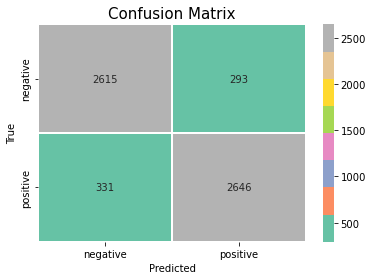

In [84]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ['negative', 'positive']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [85]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[2615,  293],
       [ 331, 2646]], dtype=int64)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2908
           1       0.90      0.89      0.89      2977

    accuracy                           0.89      5885
   macro avg       0.89      0.89      0.89      5885
weighted avg       0.89      0.89      0.89      5885



In [87]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)
lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

80.44

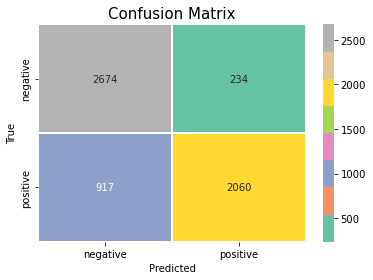

In [88]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ['negative', 'positive']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score

test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,50):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)

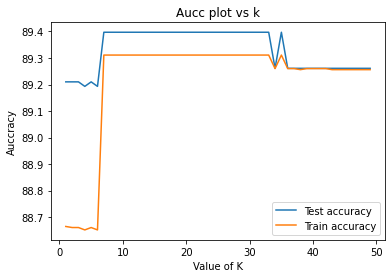

In [90]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y,label = 'Test accuracy')
plt.plot(x,y1,label = 'Train accuracy')
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

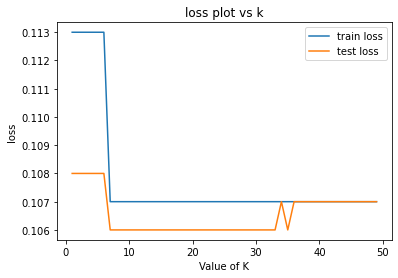

In [91]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [92]:
# test accu
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

89.21


In [93]:
#train accu
Y_pred_train= KNN.predict(X_train)
KNN_accuracy= round(accuracy_score(Y_train,Y_pred_train), 5)*100 # Accuracy
print(KNN_accuracy)

88.661


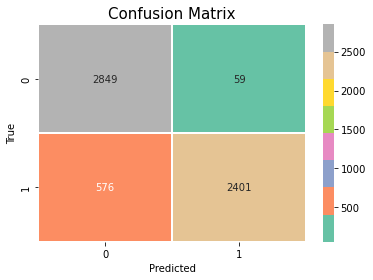

In [94]:


cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

